##             Pima Indians Diabetes Database Analysis

Pima Indians Diabetes Dataset Overview

The Pima Indians Diabetes Database is a well-known dataset used in healthcare and machine learning research. It was collected by the National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK) and includes medical data from Pima Indian women aged 21 years or older.

The primary goal of this dataset is to predict the likelihood of diabetes in a patient based on various physiological and hereditary measurements.

Dataset Details

Total Observations: 768

Target Variable: Outcome (1 = Diabetic, 0 = Non-Diabetic)

Features Include:

Number of pregnancies

Glucose concentration

Blood pressure

Skin thickness

Insulin level

Body Mass Index (BMI)

Diabetes pedigree function

Age

Significance

This dataset is widely used for:

Practicing data preprocessing and cleaning

Performing feature selection and engineering

Building and evaluating binary classification models such as Logistic Regression, Decision Trees, Random Forests, and Support Vector Machines (SVM)

By analyzing this dataset, researchers can better understand how physiological and genetic factors contribute to diabetes risk.

### import required  Libraries


In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
filterwarnings("ignore")

### Load dataset"diabetes"

In [63]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [64]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [67]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [68]:
df[['Insulin','BloodPressure']].value_counts()


Insulin  BloodPressure
0        0                35
         70               26
         80               23
         78               22
         74               21
                          ..
37       76                1
         80                1
38       66                1
40       72                1
402      70                1
Name: count, Length: 412, dtype: int64

In [69]:
col_list_to_check = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in col_list_to_check:
    zero_count = (df[col] == 0).sum()
    zero_percentage = 100 * zero_count /len(df)
    print(f"{col}: {zero_count} %{zero_percentage:.2f}")

Glucose: 5 %0.65
BloodPressure: 35 %4.56
SkinThickness: 227 %29.56
Insulin: 374 %48.70
BMI: 11 %1.43


### Apply EDA process

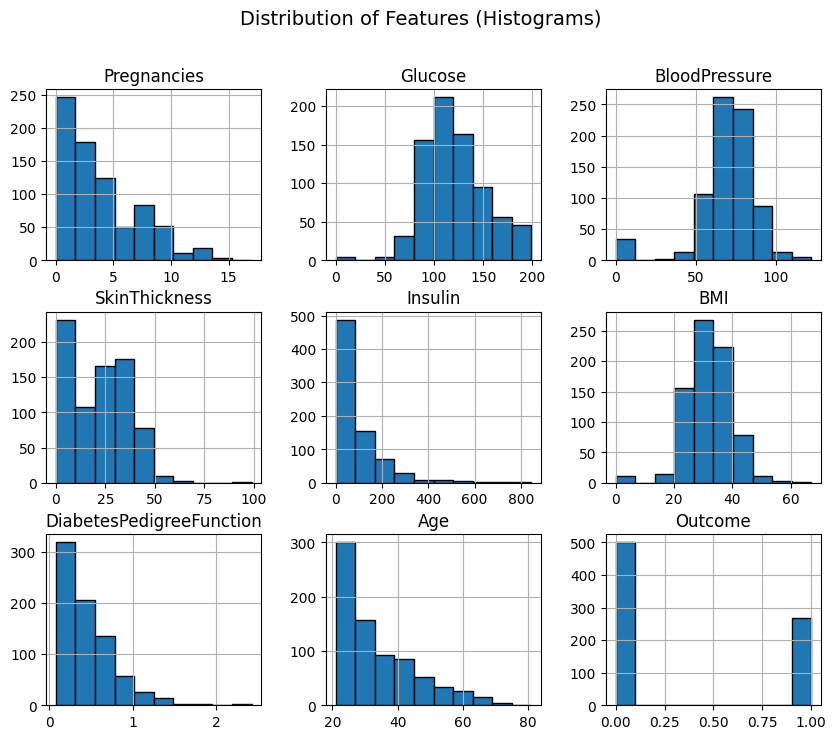

In [70]:
df.hist(figsize=(10,8), edgecolor='black')
plt.suptitle("Distribution of Features (Histograms)", fontsize=14)
plt.show()

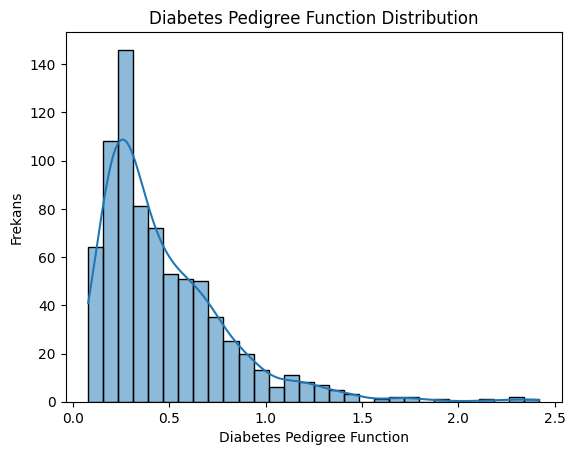

In [71]:
sns.histplot(df['DiabetesPedigreeFunction'], bins=30, kde=True)
plt.title('Diabetes Pedigree Function Distribution')
plt.xlabel('Diabetes Pedigree Function')
plt.ylabel('Frekans')
plt.show()

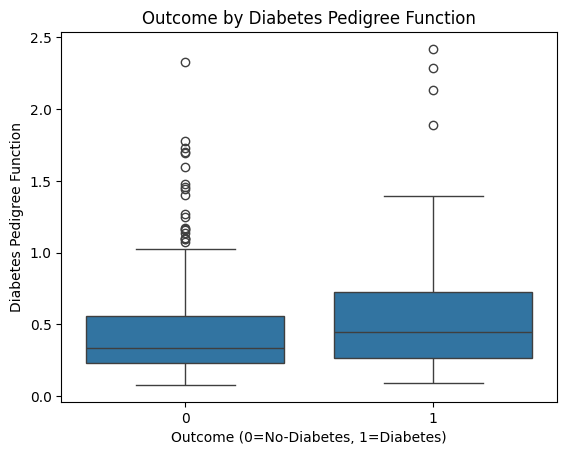

In [72]:
sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction', data=df)
plt.title('Outcome by Diabetes Pedigree Function')
plt.xlabel('Outcome (0=No-Diabetes, 1=Diabetes)')
plt.ylabel('Diabetes Pedigree Function')
plt.show()

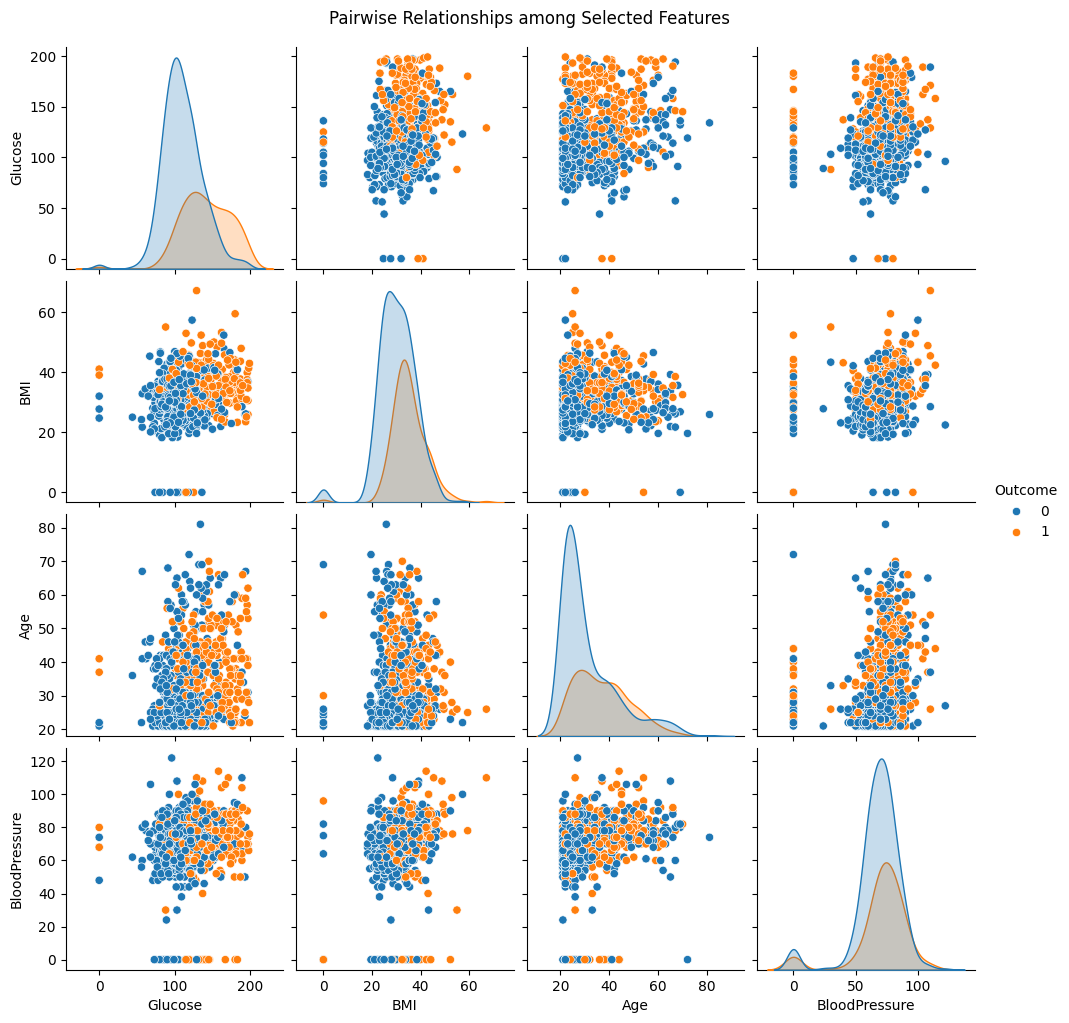

In [73]:
sns.pairplot(df, vars=['Glucose','BMI','Age','BloodPressure'], hue='Outcome')
plt.suptitle("Pairwise Relationships among Selected Features", y=1.02)
plt.show()

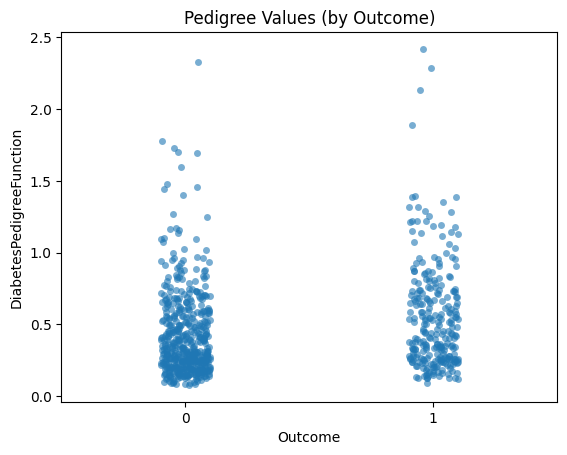

In [74]:
sns.stripplot(x='Outcome', y='DiabetesPedigreeFunction', data=df, jitter=True, alpha=0.6)
plt.title('Pedigree Values (by Outcome)')
plt.show()

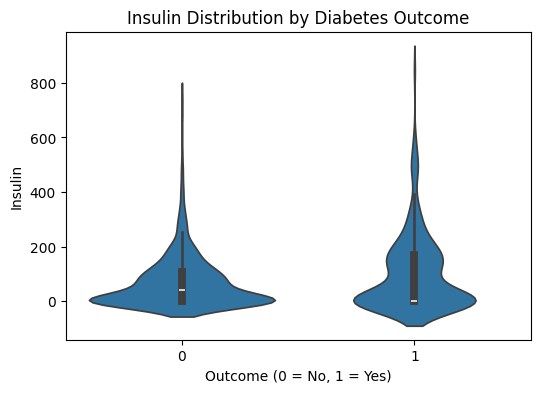

In [75]:
plt.figure(figsize=(6,4))
sns.violinplot(x='Outcome', y='Insulin', data=df)
plt.title("Insulin Distribution by Diabetes Outcome")
plt.xlabel("Outcome (0 = No, 1 = Yes)")
plt.ylabel("Insulin")
plt.show()

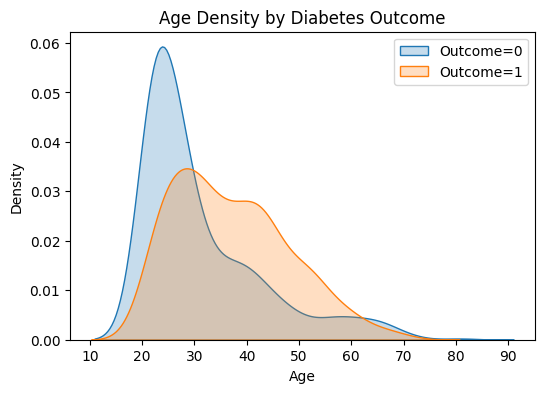

In [76]:
plt.figure(figsize=(6,4))
for outcome in [0,1]:
    subset = df[df['Outcome']==outcome]
    sns.kdeplot(subset['Age'], label=f"Outcome={outcome}", shade=True)
plt.title("Age Density by Diabetes Outcome")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.show()


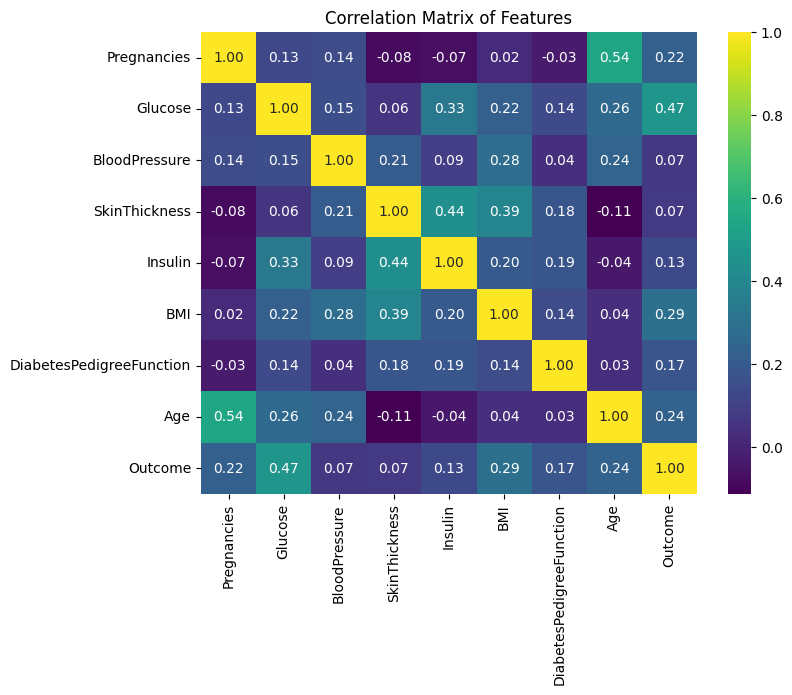

In [77]:
plt.figure(figsize=(8,6))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='viridis')
plt.title("Correlation Matrix of Features")
plt.show()


### Preprocessing

In [78]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=15)

In [80]:
columns_to_fill = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

In [81]:
medians = {}
for col in columns_to_fill:
    median_value = X_train[X_train[col] != 0][col].median()
    medians[col] = median_value
    X_train[col] = X_train[col].replace(0, median_value)

for col in columns_to_fill:
    X_test[col] = X_test[col].replace(0, medians[col])

In [82]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [83]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

In [84]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       108
           1       0.58      0.63      0.60        46

    accuracy                           0.75       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.76      0.75      0.76       154

0.7532467532467533
[[87 21]
 [17 29]]


In [85]:
adaboost_param = {
        "n_estimators" : [50, 70, 100, 120, 150, 200],
        "learning_rate" : [0.001, 0.01, 0.1, 1, 10]
}

In [86]:
grid = GridSearchCV(estimator = AdaBoostClassifier(), param_grid = adaboost_param, cv = 5, verbose = 1, n_jobs = -1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


,estimator,AdaBoostClassifier()
,param_grid,"{'learning_rate': [0.001, 0.01, ...], 'n_estimators': [50, 70, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,estimator,None


In [87]:
grid.best_params_
ada = AdaBoostClassifier(learning_rate=1, n_estimators=150)
ada.fit(X_train, y_train)
ada.score(X_test,y_test)

0.7597402597402597

In [88]:
y_pred = ada.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       108
           1       0.59      0.65      0.62        46

    accuracy                           0.76       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.77      0.76      0.76       154

0.7597402597402597
[[87 21]
 [16 30]]


### Conclusion

Proper data preprocessing, especially handling missing and invalid values, greatly improves model accuracy. Key features like glucose, BMI, and insulin are strong predictors of diabetes, while age and pregnancies show moderate influence. Replacing zero values with the median preserves data quality and helps models like Logistic Regression and SVM make more reliable predictions.